# Content
## 1. Pregatirea datelor
## 2. Selectarea algoritmului corespunzator problemei
## 3. Implementarea algoritmului si realizarea predictiei
## 4. Evaluarea modelului
## 5. Imbunatatirea modelului
## 6. Salvarea si incarcarea modelului
## 7. Combinarea tuturor etapelor


# 0. Importul bibliotecilor

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Pregatirea datelor

Content
1. Importul datelor
2. Divizarea datelor in date feature si date labels (X si y)
3. Completarea sau excluderea datelor lipsa
4. Conversia valorilor non-numetice in numerice (feature encoding)

In [169]:
# importul datelor
heart_disease=pd.read_csv('heart-disease.csv')

In [170]:
heart_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [171]:
# Verificare datelor lipsa in coloana labels (target)
heart_disease['target'].isna().sum()

0

Deoarece nu exita nici o lipsa in coloana label se continu cu intregul set de date. Daca ar fi existat astfel de lipsuri, randul corespunzator ar fi trebuit exclus din setul de date

In [172]:
# Divizarea datelor (coloanelor) in date feature X (caracteristici) si date labels y (rezultat)
np.random.seed(9)
X=heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [173]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [174]:
# Divizarea datelor in setul training si setul test
np.random.seed(9)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2)

In [175]:
# Verificarea dimensiunilor seturilor de training si de test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [176]:
# Verificarea prezentei datelor lipsa seturile feature de training (in colona label s-a verificat mai sus)
X_train.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [177]:
# Verificarea prezentei datelor lipsa seturile feature de test (in colona label s-a verificat mai sus)
X_test.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

Nu exista date lipsa, deci nu este necesara procedura de completare a datelor lipsa 

In [178]:
# Verificare tipurilor de date in fiecare coloana
heart_disease.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Toate datele sunt de tip numeric deci nu este necesara procedura de conversie a datelor non-numerice in numerice

# 2a. Selectarea algoritmului corespunzator problemei

Sarcina problemei este de a determina daca o persoana este bolnava de inima sau nu, deci problema face parte din categoria problemelor de clasificare si prin urmare se va selecta un algoritm (estimator) de clasificare

Pentru selectarea algoritmului/estimator-ului corespunzator se va parcurge harta: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Conform hartii scikit-learn se alege algoritmul LinearSVC

In [179]:
#Importul estimatorului LinearSVC
from sklearn.svm import LinearSVC

In [180]:
# Instantierea algoritmului LinearSVC
clf=LinearSVC()

# 3a. Implementarea algoritmului

In [181]:
#Implementarea algoritmului LinearSVC pe datele de training
clf.fit(X_train, y_train)

E:\Machine_learning\Machine_learning_projects\Classification_project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

# 4a. Evaluarea modelului

In [182]:
# Evaluarea modelului pe datele de test
clf.score(X_test, y_test)

0.47540983606557374

Modelul elaborat pe baza datelor de training implementand algoritmul LinearSVC are o precizie de 47% la evaluarea sa pe datele de test.
In incercarea de a creste aceasta precizie se va incerca utiliza altul algoritm conform hartii scikit-learn

# 2b. Selectarea altui algoritmului

Conform hartii scikit-learn daca nu suntem multumiti cu precizia lui modelului pe baza algoritmului LinearSVC urmatorul algorit ce poate fi utilizat este KNeighborsClassifier

In [185]:
#Importul estimatorului KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [186]:
# Instantierea algoritmului KNeighborsClassifier
clf=KNeighborsClassifier()

# 3b. Implementarea algoritmului

In [187]:
#Implementarea algoritmului KNeighborsClassifier pe datele de training
clf.fit(X_train, y_train)

KNeighborsClassifier()

# 4b. Evaluarea modelului

In [188]:
# Evaluarea modelului pe datele de test
clf.score(X_test, y_test)

0.7049180327868853

Modelul elaborat pe baza datelor de training implementand algoritmul KNeighborsClassifier are o precizie de 70% la evaluarea sa pe datele de test.
Conform hartii scikit-learn daca nu suntem multumiti de preciziile obtinute se mai incerca de a utiliza si alt algoritm 

# 2c. Selectarea altui algoritmului

Conform hartii scikit-learn daca nu suntem multumiti cu precizia lui modelului pe baza algoritmului KNeighborsClassifier urmatorul algoritm ce poate fi utilizat este unui din categoria Ensemble Classifier care de exemplu poate fi RandomForestClassifier

In [189]:
#Importul estimatorului RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [207]:
# Instantierea algoritmului RandomForestClassifier
np.random.seed(9)
clf = RandomForestClassifier()

# 3c. Implementarea algoritmului

In [208]:
#Implementarea algoritmului RandomForestClassifier pe datele de training
clf.fit(X_train, y_train)

RandomForestClassifier()

# 4c. Evaluarea modelului

In [209]:
# Evaluarea modelului pe datele de test
clf.score(X_test, y_test)

0.7540983606557377

Modelul elaborat pe baza datelor de training implementand algoritmul RandomForestClassifier are o precizie de 75% la evaluarea sa pe datele de test.
Pentru a creste aceasta precizie se poate utilizat un alt algoritm din categoria Ensemble Classifier care de exemplu poate fi AdaBoostClassifier

# 2d. Selectarea altui algoritmului

In [210]:
#Importul estimatorului AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [211]:
# Instantierea algoritmului AdaBoostClassifier
clf = AdaBoostClassifier()

# 3d. Implementarea algoritmului

In [212]:
#Implementarea algoritmului AdaBoostClassifier pe datele de training
clf.fit(X_train, y_train)

AdaBoostClassifier()

# 4d. Evaluarea modelului

In [213]:
# Evaluarea modelului pe datele de test
clf.score(X_test, y_test)

0.819672131147541

Modelul elaborat pe baza datelor de training implementand algoritmul AdaBoostClassifier are o precizie de 82% la evaluarea sa pe datele de test, cea mai mare pina acum de aceea ne vor opri aici.

# 3*. Realizarea predictiei utilizand modelul elaborat

## a) Metoda `predict()`

In [214]:
# Realizarea predictie asupra datelor de test (valorile prezise)
y_preds=clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [215]:
# Afisarea datelor label de test in acelasi format (valorile adevarate)
np.array(y_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [216]:
# Compararea valorilor prezise cu cele adevarate
np.mean(y_preds==y_test)

0.819672131147541

## b) Metoda `predict_proba()`

In [217]:
#Se verifica valorile posibile ale setul label de test y_test
y_test.value_counts()

1    38
0    23
Name: target, dtype: int64

Setul label contine doar 2 valori posibile 0 si 1. Modelul elaborat pentru fiecare valoare de test va pezice una dintre aceste valori

In [218]:
# Determinarea probabilitatii de prezicere pentru fiecarea valoare
np.random.seed(9)
y_preds_prob=clf.predict_proba(X_test)
y_preds_prob

array([[0.47762637, 0.52237363],
       [0.47584965, 0.52415035],
       [0.49527495, 0.50472505],
       [0.48349326, 0.51650674],
       [0.51178949, 0.48821051],
       [0.47650329, 0.52349671],
       [0.46470756, 0.53529244],
       [0.48418237, 0.51581763],
       [0.46573881, 0.53426119],
       [0.48733339, 0.51266661],
       [0.7098402 , 0.2901598 ],
       [0.52181646, 0.47818354],
       [0.70891484, 0.29108516],
       [0.47336685, 0.52663315],
       [0.47278089, 0.52721911],
       [0.47891123, 0.52108877],
       [0.48579132, 0.51420868],
       [0.53826741, 0.46173259],
       [0.56844122, 0.43155878],
       [0.48900173, 0.51099827],
       [0.46706562, 0.53293438],
       [0.49606154, 0.50393846],
       [0.55258449, 0.44741551],
       [0.46117321, 0.53882679],
       [0.72558116, 0.27441884],
       [0.48862231, 0.51137769],
       [0.46816917, 0.53183083],
       [0.53418222, 0.46581778],
       [0.47031278, 0.52968722],
       [0.50022705, 0.49977295],
       [0.

In [219]:
# Compararea rezultatelor functiilor predict si predict proba
y_preds[:5], y_preds_prob[:5]

(array([1, 1, 1, 1, 0], dtype=int64),
 array([[0.47762637, 0.52237363],
        [0.47584965, 0.52415035],
        [0.49527495, 0.50472505],
        [0.48349326, 0.51650674],
        [0.51178949, 0.48821051]]))

Se observa ca probabilitatile de prezicere sunt foarte apropiate, iar valoarea prezisa este aceea care are probabilitatea peste 0.5. Functia predict_proba este forate utila atunci cand setul label are mai mult de 2 valri posibile.
In continuare se va examina rezultatel predictie cu ambele metode pentru cazul implementarii algoritmului RandomForestClassifier

In [220]:
#instantierea si implementarea algoritmului RandomForestClassifier

np.random.seed(9)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# realizarea predictiei cu metoda predict()
y_preds=clf.predict(X_test)

# determinarea probabilitatii de predictie cu metoda predict_proba()
y_preds_prob=clf.predict_proba(X_test)

#Afisarea primelor rezultate
y_preds[:5], y_preds_prob[:5] 

(array([1, 1, 0, 1, 0], dtype=int64),
 array([[0.07, 0.93],
        [0.2 , 0.8 ],
        [0.52, 0.48],
        [0.33, 0.67],
        [0.7 , 0.3 ]]))

In [221]:
y_preds

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

# 4*. Evaluarea modelului

## a) Evaluarea modelului cu metoda `score()` (evaluarea implicita)

In [222]:
# Evaluarea pe baza datelor de training
clf.score(X_train, y_train)

1.0

In [223]:
# Evaluarea pe baza datelor de test
clf.score(X_test, y_test)

0.7540983606557377

## b) Evaluarea modelului utilizand `cross-validation` (cu parametru implicit - accuracy)

In [267]:
# importul modulului cross-validation
from sklearn.model_selection import cross_val_score

In [225]:
# realizarea evaluarii
cross_val_score(clf, X, y, cv = 5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.78333333])

In [226]:
# Valoarea medie a evaluarii cross-validation
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv = 5))

# Evaluarea modelului prin metoda score
clf_single_score = clf.score(X_test, y_test)

# Afisarea comparativa
clf_single_score, clf_cross_val_score 


(0.7540983606557377, 0.828087431693989)

In [227]:
# Afisarea parametrului accuracy (parametru implicit)
print(f'Parametrul `accuracy` obtinut la evaluarea cross-validation a modelului are valoarea {(clf_cross_val_score)*100:.2f}%')

Parametrul `accuracy` obtinut la evaluarea cross-validation a modelului are valoarea 82.81%


## c) Evaluarea modelului utilizand parametrul `Area under the ROC (Receiver Operating Characteristic) (AUC)`

Curbele ROC reprezinta o comparatie a ratei pozitive adevarate (tpr - true positive rate) a modelului si a ratei pozitive falsa (ftr - false positive rate) a acestuia.
* pozitiv adevarat = modelul prezice 1 cand adevarul e 1
* pozitiv fals = modelul prezice 1 cand adevarul este 0
* negativ adevarat = modelul prezice 0 cand adevarul e 0
* negativ fals = modelul prezice 0 cand adevarul este 1

In [228]:
# importul modulului roc_curse
from sklearn.metrics import roc_curve

In [229]:
# relizarea predictie cu probabilitate
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.07, 0.93],
       [0.2 , 0.8 ],
       [0.52, 0.48],
       [0.33, 0.67],
       [0.7 , 0.3 ],
       [0.25, 0.75],
       [0.1 , 0.9 ],
       [0.25, 0.75],
       [0.12, 0.88],
       [0.32, 0.68]])

In [230]:
# selectarea doar a probabilitatilor aparitie 1 din y_probs
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.93, 0.8 , 0.48, 0.67, 0.3 , 0.75, 0.9 , 0.75, 0.88, 0.68])

In [231]:
# calcularea fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [232]:
# Afisarea fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.08695652, 0.08695652, 0.08695652, 0.13043478,
       0.17391304, 0.2173913 , 0.2173913 , 0.30434783, 0.30434783,
       0.39130435, 0.43478261, 0.43478261, 0.47826087, 0.47826087,
       0.60869565, 0.69565217, 0.73913043, 0.86956522, 1.        ])

In [233]:
# Afisarea tpr
tpr

array([0.        , 0.02631579, 0.05263158, 0.13157895, 0.18421053,
       0.21052632, 0.26315789, 0.31578947, 0.36842105, 0.36842105,
       0.44736842, 0.52631579, 0.57894737, 0.63157895, 0.63157895,
       0.68421053, 0.68421053, 0.86842105, 0.86842105, 0.89473684,
       0.89473684, 0.89473684, 0.92105263, 0.94736842, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [234]:
# Afisarea thresholds
thresholds

array([1.99, 0.99, 0.98, 0.96, 0.95, 0.94, 0.93, 0.88, 0.87, 0.84, 0.8 ,
       0.76, 0.75, 0.73, 0.68, 0.67, 0.64, 0.44, 0.39, 0.37, 0.36, 0.34,
       0.32, 0.3 , 0.21, 0.09, 0.07, 0.06, 0.05, 0.  ])

In [235]:
# crearea functiei de afisare a curbei ROC

def plot_roc_curve(fpr, tpr):
    """
    Afiseaza graficul dependentei ratei pozitive false (fpr) de rata pozitiva adevarata (tpr)
    """
    plt.plot(fpr, tpr, color="blue")
    plt.xlabel("Rata pozitiva falsa (fpr)")
    plt.ylabel("Rata pozitiva adevarata (tpr)")
    plt.title('Curba ROC')
    plt.show()

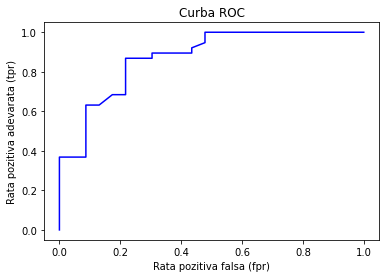

In [236]:
# apelara functiei de constructie a graficului curbei ROC
plot_roc_curve(fpr, tpr)

In [238]:
# Determinarea ariei de sub curba ROC (AUC)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8724256292906178

Mai multe detalii despre ROC si AUC se pot gasi pe adresa:https://www.youtube.com/watch?v=4jRBRDbJemM&ab_channel=StatQuestwithJoshStarmer 

## d) Evaluarea modelului utilizand `Confusion matrix` 

In [239]:
# importul modulului confusion_matrix
from sklearn.metrics import confusion_matrix

In [246]:
# elaborarea confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat 

array([[18,  5],
       [10, 28]], dtype=int64)

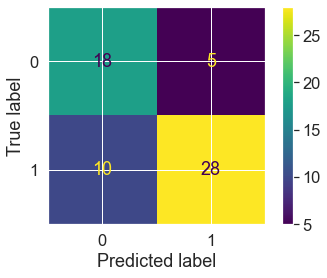

In [259]:
# Vizualizarea confusion matrix utilizand plot_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test);

In [260]:
# Vizualizarea confusion matrix utilizand pd.crossstab()
pd.crosstab(y_test,
            y_preds,
            rownames=['Valori adevarate'],
            colnames=['Valori prezise'])

Valori prezise,0,1
Valori adevarate,,
0,18,5
1,10,28


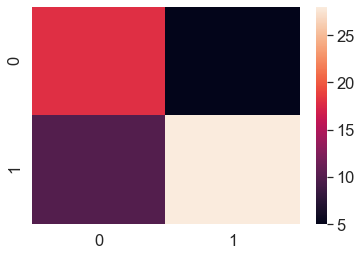

In [261]:
# Vizualizarea confusion matrix utilizand sns.crossstab()
sns.set(font_scale=1.5)
sns.heatmap(conf_mat);

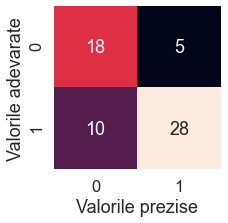

In [262]:
# perfectionare vizualizarii confusion matric prin eleborarea unei functii
def plot_conf_mat(conf_mat):
    """
    Vizualizeaza confusion matrix prin utilizarea Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # includerea informatie pe grafic
                     cbar=False # ecluderea barei cu culori
                     )
    plt.xlabel('Valorile prezise')
    plt.ylabel('Valorile adevarate')

plot_conf_mat(conf_mat)

## e) Evaluarea modelului utilizand `Classification Report`

In [263]:
# importul modului classifiction_report
from sklearn.metrics import classification_report

In [281]:
# vizualizarea classification_report
np.random.seed(9)
classif_report = classification_report(y_test, y_preds)
print(classif_report)

              precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.85      0.74      0.79        38

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.77      0.75      0.76        61



In [266]:
# vizualizarea classification_report cu ajutorul pandas
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.642857,0.848485,0.754098,0.745671,0.770953
recall,0.782609,0.736842,0.754098,0.759725,0.754098
f1-score,0.705882,0.788732,0.754098,0.747307,0.757494
support,23.000000,38.000000,0.754098,61.000000,61.000000


Explicatii detaliate referitoare la parametrii din classification report se pot gasi pe adresele:
https://www.youtube.com/watch?v=8U65xDCzs_4&ab_channel=technologyCult

https://towardsdatascience.com/choosing-performance-metrics-61b40819eae1

https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
    

## f) Evaluarea modelului modificand parametrul `scoring` in `cross-validation`

In [288]:
# importul modulului cross-validation
from sklearn.model_selection import cross_val_score

#### a. Parametrul implicit `scoring=None` 

In [287]:
# Utilizarea cross-validation cu parametrul scoring implicit (scoring=None)

np.random.seed(9)
cv_imp=cross_val_score(clf, X, y, cv=5, scoring=None)
cv_imp

array([0.81967213, 0.8852459 , 0.81967213, 0.81666667, 0.76666667])

In [286]:
# afisarea valorii medii
print(f'Valoarea medie a rezultatelor cross_validation este: {np.mean(cv_imp)*100:.2f}%')

Valoarea medie a rezultatelor cross_validation este: 82.16%


#### b. Parametrul `scoring='accuracy'` 

In [285]:
# Utilizarea cross-validation cu parametrul scoring='accuracy'

np.random.seed(9)
cv_acc=cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

array([0.81967213, 0.8852459 , 0.81967213, 0.81666667, 0.76666667])

In [284]:
# afisarea valorii medii a accuracy
print(f'Valoarea medie a accuracy in cross_validation este: {np.mean(cv_acc)*100:.2f}%')

Valoarea medie a accuracy in cross_validation este: 82.16%


Rezultatele in cazul `scoring=None` si `scoring='accuracy'` sunt acelesi adica paramatrul implicit in cazul cross-validation este accuracy

#### c. Parametrul `scoring='precision'` 

In [289]:
# Utilizarea cross-validation cu parametrul scoring='precision'

np.random.seed(9)
cv_precision=cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.80555556, 0.93333333, 0.82352941, 0.84375   , 0.75675676])

In [282]:
# afisarea valorii medii a precision
print(f'Valoarea medie a precision in cross_validation este: {np.mean(cv_precision)*100:.2f}%')

Valoarea medie a precision in cross_validation este: 83.26%


#### d. Parametrul `scoring='recall'`

In [279]:
# Utilizarea cross-validation cu parametrul scoring='recall'

np.random.seed(9)
cv_recall=cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.87878788, 0.84848485, 0.84848485, 0.81818182, 0.84848485])

In [280]:
# afisarea valorii medii a recall
print(f'Valoarea medie a recall in cross_validation este: {np.mean(cv_recall)*100:.2f}%')

Valoarea medie a recall in cross_validation este: 84.85%


#### e. Parametrul `scoring='f1'`

In [290]:
# Utilizarea cross-validation cu parametrul scoring='f1'

np.random.seed(9)
cv_f1=cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1

array([0.84057971, 0.88888889, 0.8358209 , 0.83076923, 0.8       ])

In [291]:
# afisarea valorii medii a f1
print(f'Valoarea medie a f1 in cross_validation este: {np.mean(cv_f1)*100:.2f}%')

Valoarea medie a f1 in cross_validation este: 83.92%


## f) Evaluarea modelului utilizand functiile de evaluare Scikit-Learn

In [292]:
# importul functiilor de evaluare
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [293]:
# evaluarea modelului cu functiile de evaluare
np.random.seed(9)

print("Rezultatele evaluarii cu diferite functii:")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')

Rezultatele evaluarii cu diferite functii:
Accuracy: 75.41%
Precision: 84.85%
Recall: 73.68%
F1: 78.87%
